In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [22]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
def read_data(filename):
    lsh_res = pd.read_csv(filename, header=None)
    lsh_res = lsh_res[[0, 11, 12, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]]
    lsh_res[0] = lsh_res[0].apply(lambda x: int(x.replace("(", "")))
    lsh_res[53] = lsh_res[53].apply(lambda x: int(x.replace(")", "")))
    lsh_res[11] = lsh_res[11].apply(lambda x: -x)
    for i in [11, 12, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]:
        lsh_res[i] = lsh_res[i].apply(lambda x: float(x))
    lsh_res = lsh_res.rename(columns={0:"queryN", 11:"meanTime", 12:"stdTime", 
                                      43:"accuracyMean", 44:"accuracyStd", 
                                      45:"precisionMean", 46: "precisionStd",
                                      47:"recallMean", 48:"recallStd",
                                      49:"distDiffMean", 50:"distDiffStd",
                                      51:"distDiffPointwiseMean", 52:"distDiffPointwiseStd",
                                      53:"querySize"})
    return lsh_res

In [5]:
def plot_dataset(theta_less, theta_more, size_label):
    plt.figure(figsize=(9, 5))

    # Plot data and save figure
    markers, caps, bars = plt.errorbar(theta_less["partitions"], theta_less["mean"], yerr=theta_less["std"], label = "$<$ condition",
                                       color="blue", marker="D", markersize=7)
    [bar.set_alpha(0.5) for bar in bars]
    markers, caps, bars = plt.errorbar(theta_more["partitions"], theta_more["mean"], yerr=theta_more["std"], label = "$>$ condition",
                                       color="orange", marker="o", markersize=7)
    [bar.set_alpha(0.5) for bar in bars]
    plt.grid(linestyle='dotted')

    # set labels (LaTeX can be used) -> Note: with the setting deactivated, this will print \textbf{...}
    plt.xlabel(r'\textbf{Partitions number}', fontsize=11)
    plt.ylabel(r'\textbf{Query execution time [s] }', fontsize=11)
    plt.title(r'\textbf{Execution time change with number of partitions - ' + size_label + ' datasets}', fontsize=13.5)
    plt.legend()
    plt.xscale("log")

    plt.savefig("plot/time_change" + size_label + ".pdf")
    plt.close()

# Tests

In [3]:
filename = "../lsh/performance/testAllOldConf/base_queries_results_10.txt/part-00000"
lsh_res = pd.read_csv(filename, header=None)
lsh_res = lsh_res[[0, 11, 12, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]]
lsh_res[0] = lsh_res[0].apply(lambda x: int(x.replace("(", "")))
lsh_res[53] = lsh_res[53].apply(lambda x: int(x.replace(")", "")))
lsh_res[11] = lsh_res[11].apply(lambda x: -x)
for i in [11, 12, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]:
    lsh_res[i] = lsh_res[i].apply(lambda x: float(x))
lsh_res = lsh_res.rename(columns={0:"queryN", 11:"meanTime", 12:"stdTime", 
                                  43:"accuracyMean", 44:"accuracyStd", 
                                  45:"precisionMean", 46: "precisionStd",
                                  47:"recallMean", 48:"recallStd",
                                  49:"distDiffMean", 50:"distDiffStd",
                                  51:"distDiffPointwiseMean", 52:"distDiffPointwiseStd",
                                  53:"querySize"})

In [4]:
lsh_res

,queryN,meanTime,stdTime,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize
0,0,0.667901,0.104841,0.995228,0.001732,0.713927,0.027550,0.847503,0.015444,0.206370,0.019775,0.206370,0.218884,319
1,1,0.753635,0.100134,0.994959,0.000473,0.733892,0.019787,0.810366,0.017946,0.181833,0.025953,0.181833,0.216500,336
2,2,0.962679,0.061688,0.995817,0.001046,0.722143,0.026113,0.841429,0.013575,0.177593,0.017574,0.177593,0.227783,327
3,3,0.981586,0.072985,0.992461,0.000935,0.704479,0.012654,0.704024,0.018082,0.262473,0.022695,0.133713,0.156486,3193
4,4,0.868299,0.134058,0.992721,0.000916,0.713167,0.021086,0.710416,0.023669,0.240520,0.023174,0.119029,0.139853,3176
5,5,0.965556,0.081883,0.991575,0.001849,0.704833,0.014649,0.706550,0.021857,0.256751,0.016965,0.130499,0.145927,3276
6,6,0.872244,0.079402,0.991794,0.001128,0.714170,0.015844,0.674028,0.023759,0.223340,0.016832,0.086607,0.118672,32287
7,7,0.881361,0.055877,0.991785,0.001414,0.716773,0.016768,0.662299,0.015102,0.235546,0.014922,0.104252,0.111124,32348


<ErrorbarContainer object of 3 artists>

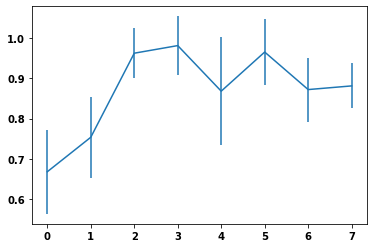

In [7]:
plt.errorbar(lsh_res["queryN"], lsh_res["meanTime"], yerr=lsh_res["stdTime"])

<ErrorbarContainer object of 3 artists>

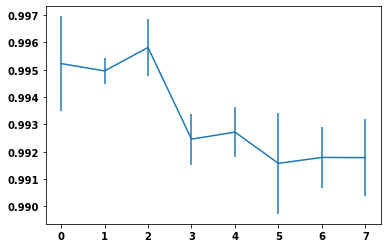

In [8]:
plt.errorbar(lsh_res["queryN"], lsh_res["accuracyMean"], yerr=lsh_res["accuracyStd"])

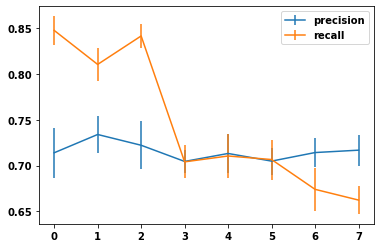

In [25]:
plt.errorbar(lsh_res["queryN"], lsh_res["precisionMean"], yerr=lsh_res["precisionStd"], label="precision")
plt.errorbar(lsh_res["queryN"], lsh_res["recallMean"], yerr=lsh_res["recallStd"], label="recall")
plt.legend()

In [ ]:
plt.errorbar(lsh_res["queryN"], lsh_res["recallMean"], yerr=lsh_res["recallStd"])

<ErrorbarContainer object of 3 artists>

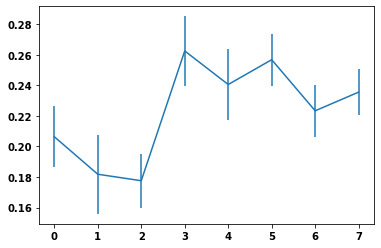

In [14]:
plt.errorbar(lsh_res["queryN"], lsh_res["distDiffMean"], yerr=lsh_res["distDiffStd"])

<ErrorbarContainer object of 3 artists>

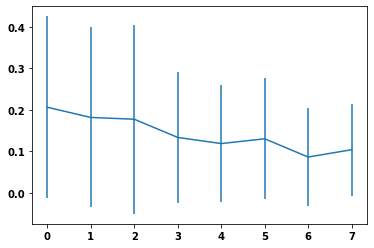

In [15]:
plt.errorbar(lsh_res["queryN"], lsh_res["distDiffPointwiseMean"], yerr=lsh_res["distDiffPointwiseStd"])

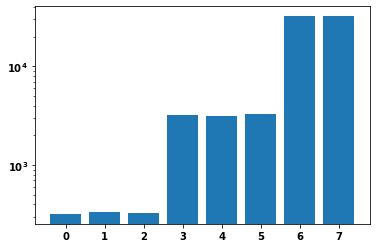

In [22]:
plt.bar(lsh_res["queryN"], lsh_res["querySize"])
plt.yscale("log")

### Broadcast

In [26]:
filename = "../lsh/performance/testAllOldConf/broadcast_queries_results_10.txt/part-00000"
lsh_res = pd.read_csv(filename, header=None)
lsh_res = lsh_res[[0, 11, 12, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]]
lsh_res[0] = lsh_res[0].apply(lambda x: int(x.replace("(", "")))
lsh_res[53] = lsh_res[53].apply(lambda x: int(x.replace(")", "")))
lsh_res[11] = lsh_res[11].apply(lambda x: -x)
for i in [11, 12, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]:
    lsh_res[i] = lsh_res[i].apply(lambda x: float(x))
lsh_res = lsh_res.rename(columns={0:"queryN", 11:"meanTime", 12:"stdTime", 
                                  43:"accuracyMean", 44:"accuracyStd", 
                                  45:"precisionMean", 46: "precisionStd",
                                  47:"recallMean", 48:"recallStd",
                                  49:"distDiffMean", 50:"distDiffStd",
                                  51:"distDiffPointwiseMean", 52:"distDiffPointwiseStd",
                                  53:"querySize"})

In [27]:
lsh_res

,queryN,meanTime,stdTime,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize
0,0,0.088706,0.009882,0.995504,0.000720,0.717286,0.015433,0.844258,0.010830,0.177546,0.013450,0.177546,0.227796,319
1,1,0.098419,0.015403,0.994519,0.000992,0.714103,0.020606,0.826587,0.014285,0.168468,0.021331,0.168468,0.201945,336
2,2,0.046986,0.017083,0.995998,0.000482,0.718778,0.020203,0.835819,0.009482,0.175158,0.021666,0.175158,0.232024,327
3,3,0.095003,0.002191,0.992385,0.001070,0.735940,0.011422,0.703574,0.015864,0.107069,0.022189,0.105675,0.146055,3193
4,4,0.097090,0.016829,0.992152,0.001153,0.736334,0.024667,0.708499,0.024673,0.110044,0.025627,0.116370,0.142330,3176
5,5,0.107859,0.027559,0.992657,0.000754,0.735032,0.015247,0.702245,0.019617,0.116715,0.024019,0.116933,0.146509,3276
6,6,0.134683,0.013522,0.990971,0.001744,0.738660,0.021862,0.674112,0.024401,0.112082,0.028814,0.108436,0.120827,32287
7,7,0.130656,0.006655,0.991810,0.000713,0.744504,0.015558,0.668041,0.027169,0.101075,0.031388,0.096568,0.117087,32348


<ErrorbarContainer object of 3 artists>

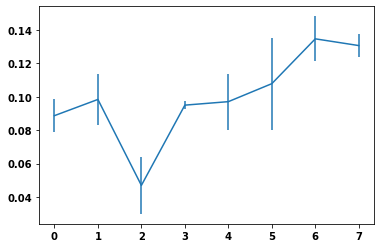

In [28]:
plt.errorbar(lsh_res["queryN"], lsh_res["meanTime"], yerr=lsh_res["stdTime"])

<ErrorbarContainer object of 3 artists>

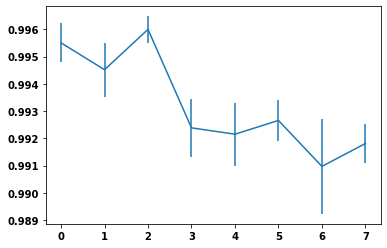

In [29]:
plt.errorbar(lsh_res["queryN"], lsh_res["accuracyMean"], yerr=lsh_res["accuracyStd"])

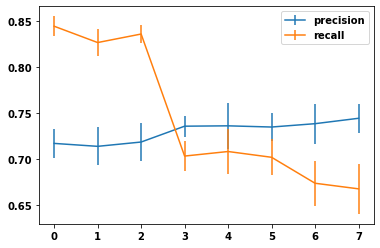

In [30]:
plt.errorbar(lsh_res["queryN"], lsh_res["precisionMean"], yerr=lsh_res["precisionStd"], label="precision")
plt.errorbar(lsh_res["queryN"], lsh_res["recallMean"], yerr=lsh_res["recallStd"], label="recall")
plt.legend()

<ErrorbarContainer object of 3 artists>

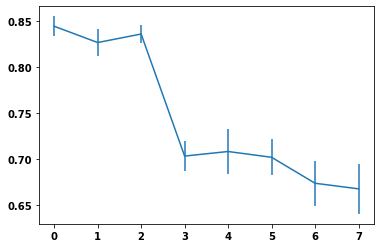

In [31]:
plt.errorbar(lsh_res["queryN"], lsh_res["recallMean"], yerr=lsh_res["recallStd"])

<ErrorbarContainer object of 3 artists>

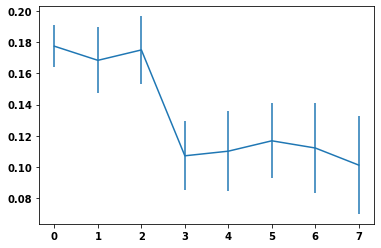

In [32]:
plt.errorbar(lsh_res["queryN"], lsh_res["distDiffMean"], yerr=lsh_res["distDiffStd"])

<ErrorbarContainer object of 3 artists>

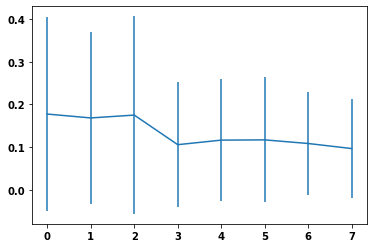

In [33]:
plt.errorbar(lsh_res["queryN"], lsh_res["distDiffPointwiseMean"], yerr=lsh_res["distDiffPointwiseStd"])

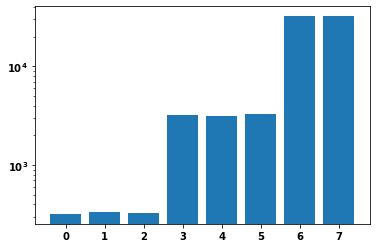

In [34]:
plt.bar(lsh_res["queryN"], lsh_res["querySize"])
plt.yscale("log")

### Testing a pointwise

In [42]:
test_base_diff_7_path = "../lsh/performance/testAllOldConf/base_query7_distance_diff_10.txt/part-00000"
diff7 = pd.read_csv(test_base_diff_7_path, header=None)
diff7[1] = diff7[1].apply(lambda x: float(x.replace(")", "")))
diff7

,0,1
0,(When Pimple Was Young: Young Pimple's Schooldays,0.197855
1,(A Merry Mickey Celebration,0.157998
2,(Korn,-0.031250
3,(WCW SuperBrawl II,0.003512
4,(Broncho Billy's Dad,0.134237
...,...,...
15525,(Abbott & Costello Starring,0.197855
15526,(Lebenslügen,0.073103
15527,(Album Flash,0.173719
15528,(The Singapore Short Story Project,-0.014032


In [48]:
diff7["sign"] = np.sign(diff7[1])
diff7_counts = diff7["sign"].value_counts()
diff7_counts

 1.0    12612
-1.0     2411
 0.0      507
Name: sign, dtype: int64

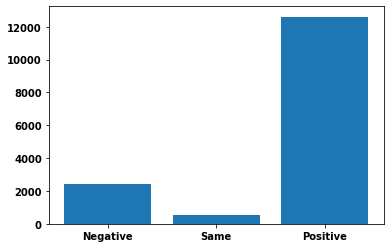

In [56]:
plt.bar(diff7_counts.index, diff7_counts.values)
plt.xticks(diff7_counts.index, ["Positive", "Negative", "Same"]);

# Correct corpuses

## 0-2 info extract

In [5]:
filename = "../lsh/performance/base_queries_0_to_2_results_5.txt/part-00000"
lsh_res02 = pd.read_csv(filename, header=None)
lsh_res02 = lsh_res02[[0, 6, 7, 9, 10, 11, 12, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
lsh_res02[0] = lsh_res02[0].apply(lambda x: int(x.replace("(", "")))
lsh_res02[40] = lsh_res02[40].apply(lambda x: int(x.replace(")", "")))
lsh_res02[12] = lsh_res02[12].apply(lambda x: float(x.replace(")", "")))
lsh_res02[13] = lsh_res02[[9, 10, 11, 12]].mean(axis=1)
lsh_res02[14] = lsh_res02[[9, 10, 11, 12]].std(axis=1)
lsh_res02 = lsh_res02[[0, 6, 7, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]

lsh_res02 = lsh_res02.rename(columns={0:"queryN", 6:"meanTime", 7:"stdTime", 
                                  13:"meanTimeExact", 14:"stdTimeExact",
                                  30:"accuracyMean", 31:"accuracyStd", 
                                  32:"precisionMean", 33:"precisionStd",
                                  34:"recallMean", 35:"recallStd",
                                  36:"distDiffMean", 37:"distDiffStd",
                                  38:"distDiffPointwiseMean", 39:"distDiffPointwiseStd",
                                  40:"querySize"})
lsh_res02["corpusSize"] = 3249
lsh_res02

,queryN,meanTime,stdTime,meanTimeExact,stdTimeExact,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize
0,2,0.777147,0.087878,2.135836,0.172675,0.995657,0.001217,0.728451,0.012774,0.843807,0.007640,0.168407,0.018575,0.168407,0.238100,327,3249
1,0,0.736215,0.189205,2.232890,0.234483,0.995630,0.000826,0.712322,0.025565,0.852293,0.013807,0.186353,0.030214,0.186353,0.217428,319,3249
2,1,0.653741,0.149985,2.684796,0.289308,0.994487,0.001127,0.719251,0.025496,0.819479,0.013815,0.181696,0.016823,0.181696,0.217447,336,3249


## 3-5 info extract

In [6]:
filename = "../lsh/performance/base_queries_3_to_5_results_5.txt/part-00000"
lsh_res35 = pd.read_csv(filename, header=None)
lsh_res35 = lsh_res35[[0, 6, 7, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
lsh_res35[0] = lsh_res35[0].apply(lambda x: int(x.replace("(", "")))
lsh_res35[40] = lsh_res35[40].apply(lambda x: int(x.replace(")", "")))

lsh_res35 = lsh_res35.rename(columns={0:"queryN", 6:"meanTime", 7:"stdTime", 
                                  13:"meanTimeExact", 14:"stdTimeExact",
                                  30:"accuracyMean", 31:"accuracyStd", 
                                  32:"precisionMean", 33:"precisionStd",
                                  34:"recallMean", 35:"recallStd",
                                  36:"distDiffMean", 37:"distDiffStd",
                                  38:"distDiffPointwiseMean", 39:"distDiffPointwiseStd",
                                  40:"querySize"})
lsh_res35["corpusSize"] = 32526
lsh_res35

,queryN,meanTime,stdTime,meanTimeExact,stdTimeExact,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize
0,5,1.318915,0.221753,187.314898,9.332276,0.994529,0.001868,0.541492,0.009902,0.756525,0.010129,0.328953,0.011567,0.328953,0.285472,3276,32526
1,3,0.941544,0.128587,216.734905,7.839181,0.995334,0.001295,0.554434,0.006433,0.754297,0.007404,0.324757,0.008527,0.324757,0.291718,3193,32526
2,4,0.877163,0.014530,171.775972,5.314031,0.995659,0.000576,0.561791,0.007255,0.753600,0.006026,0.315963,0.019855,0.315963,0.280166,3176,32526


## 6 info extract

In [7]:
filename = "../lsh/performance/base_queries_6_to_6_results_5.txt/part-00000"
lsh_res6 = pd.read_csv(filename, header=None)
filename = "../lsh/performance/base_queries_results_1.txt/part-00000"
lsh_res6ex = pd.read_csv(filename, header=None)
lsh_res6[13] = lsh_res6ex.iloc[6][5]
lsh_res6[14] = 0
lsh_res6 = lsh_res6[[0, 6, 7, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
lsh_res6[0] = lsh_res6[0].apply(lambda x: int(x.replace("(", "")))
lsh_res6[40] = lsh_res6[40].apply(lambda x: int(x.replace(")", "")))

lsh_res6 = lsh_res6.rename(columns={0:"queryN", 6:"meanTime", 7:"stdTime", 
                                  13:"meanTimeExact", 14:"stdTimeExact",
                                  30:"accuracyMean", 31:"accuracyStd", 
                                  32:"precisionMean", 33:"precisionStd",
                                  34:"recallMean", 35:"recallStd",
                                  36:"distDiffMean", 37:"distDiffStd",
                                  38:"distDiffPointwiseMean", 39:"distDiffPointwiseStd",
                                  40:"querySize"})
lsh_res6["corpusSize"] = 323187
lsh_res6

,queryN,meanTime,stdTime,meanTimeExact,stdTimeExact,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize
0,6,2.580279,0.118064,14502.254939,0,0.994867,0.000888,0.460618,0.007442,0.679964,0.016402,0.398717,0.015704,0.398717,0.280279,32287,323187


## 7 info extract

In [8]:
filename = "../lsh/performance/base_queries_7_to_7_results_5.txt/part-00000"
lsh_res7 = pd.read_csv(filename, header=None)
filename = "../lsh/performance/base_queries_results_1.txt/part-00000"
lsh_res7ex = pd.read_csv(filename, header=None)
lsh_res7[13] = lsh_res7ex.iloc[7][5]
lsh_res7[14] = 0
lsh_res7 = lsh_res7[[0, 6, 7, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
lsh_res7[0] = lsh_res7[0].apply(lambda x: int(x.replace("(", "")))
lsh_res7[40] = lsh_res7[40].apply(lambda x: int(x.replace(")", "")))

lsh_res7 = lsh_res7.rename(columns={0:"queryN", 6:"meanTime", 7:"stdTime", 
                                  13:"meanTimeExact", 14:"stdTimeExact",
                                  30:"accuracyMean", 31:"accuracyStd", 
                                  32:"precisionMean", 33:"precisionStd",
                                  34:"recallMean", 35:"recallStd",
                                  36:"distDiffMean", 37:"distDiffStd",
                                  38:"distDiffPointwiseMean", 39:"distDiffPointwiseStd",
                                  40:"querySize"})
lsh_res7["corpusSize"] = 323187
lsh_res7

,queryN,meanTime,stdTime,meanTimeExact,stdTimeExact,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize
0,7,2.777529,0.312522,17924.208014,0,0.995482,0.000116,0.466255,0.003964,0.672401,0.013481,0.398293,0.013037,0.398293,0.278784,32348,323187


## Merging

In [9]:
base_lsh = pd.concat([lsh_res02, lsh_res35, lsh_res6, lsh_res7]).sort_values(by="queryN")
exact_lsh = base_lsh[["queryN", "meanTimeExact", "stdTimeExact"]].set_index("queryN")
base_lsh = base_lsh.drop(["meanTimeExact", "stdTimeExact"], axis=1).set_index("queryN")

In [10]:
exact_lsh

,meanTimeExact,stdTimeExact
queryN,,
0,2.232890,0.234483
1,2.684796,0.289308
2,2.135836,0.172675
3,216.734905,7.839181
4,171.775972,5.314031
5,187.314898,9.332276
6,14502.254939,0.000000
7,17924.208014,0.000000


In [11]:
base_lsh

,meanTime,stdTime,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize
queryN,,,,,,,,,,,,,,
0,0.736215,0.189205,0.995630,0.000826,0.712322,0.025565,0.852293,0.013807,0.186353,0.030214,0.186353,0.217428,319,3249
1,0.653741,0.149985,0.994487,0.001127,0.719251,0.025496,0.819479,0.013815,0.181696,0.016823,0.181696,0.217447,336,3249
2,0.777147,0.087878,0.995657,0.001217,0.728451,0.012774,0.843807,0.007640,0.168407,0.018575,0.168407,0.238100,327,3249
3,0.941544,0.128587,0.995334,0.001295,0.554434,0.006433,0.754297,0.007404,0.324757,0.008527,0.324757,0.291718,3193,32526
4,0.877163,0.014530,0.995659,0.000576,0.561791,0.007255,0.753600,0.006026,0.315963,0.019855,0.315963,0.280166,3176,32526
5,1.318915,0.221753,0.994529,0.001868,0.541492,0.009902,0.756525,0.010129,0.328953,0.011567,0.328953,0.285472,3276,32526
6,2.580279,0.118064,0.994867,0.000888,0.460618,0.007442,0.679964,0.016402,0.398717,0.015704,0.398717,0.280279,32287,323187
7,2.777529,0.312522,0.995482,0.000116,0.466255,0.003964,0.672401,0.013481,0.398293,0.013037,0.398293,0.278784,32348,323187


## Broadcast

### 0-2

In [12]:
filename = "../lsh/performance/broadcast_queries_0_to_2_results_5.txt/part-00000"
lsh_res02 = pd.read_csv(filename, header=None)
lsh_res02 = lsh_res02[[0, 6, 7, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
lsh_res02[0] = lsh_res02[0].apply(lambda x: int(x.replace("(", "")))
lsh_res02[40] = lsh_res02[40].apply(lambda x: int(x.replace(")", "")))

lsh_res02 = lsh_res02.rename(columns={0:"queryN", 6:"meanTime", 7:"stdTime", 
                                  13:"meanTimeExact", 14:"stdTimeExact",
                                  30:"accuracyMean", 31:"accuracyStd", 
                                  32:"precisionMean", 33:"precisionStd",
                                  34:"recallMean", 35:"recallStd",
                                  36:"distDiffMean", 37:"distDiffStd",
                                  38:"distDiffPointwiseMean", 39:"distDiffPointwiseStd",
                                  40:"querySize"})
lsh_res02["corpusSize"] = 3249
lsh_res02

,queryN,meanTime,stdTime,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize
0,1,0.112048,0.021384,0.995028,0.000136,0.735635,0.023621,0.815561,0.020600,0.174752,0.018743,0.174752,0.220326,336,3249
1,0,0.129405,0.015674,0.995797,0.000507,0.723435,0.005799,0.843672,0.017722,0.189873,0.021643,0.189873,0.224536,319,3249
2,2,0.053942,0.002502,0.994289,0.002682,0.719227,0.027785,0.840258,0.011246,0.162844,0.033590,0.162844,0.232125,327,3249


### 3-5

In [13]:
filename = "../lsh/performance/broadcast_queries_3_to_5_results_5.txt/part-00000"
lsh_res35 = pd.read_csv(filename, header=None)
lsh_res35 = lsh_res35[[0, 6, 7, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
lsh_res35[0] = lsh_res35[0].apply(lambda x: int(x.replace("(", "")))
lsh_res35[40] = lsh_res35[40].apply(lambda x: int(x.replace(")", "")))

lsh_res35 = lsh_res35.rename(columns={0:"queryN", 6:"meanTime", 7:"stdTime", 
                                  13:"meanTimeExact", 14:"stdTimeExact",
                                  30:"accuracyMean", 31:"accuracyStd", 
                                  32:"precisionMean", 33:"precisionStd",
                                  34:"recallMean", 35:"recallStd",
                                  36:"distDiffMean", 37:"distDiffStd",
                                  38:"distDiffPointwiseMean", 39:"distDiffPointwiseStd",
                                  40:"querySize"})
lsh_res35["corpusSize"] = 32526
lsh_res35

,queryN,meanTime,stdTime,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize
0,4,0.141948,0.011778,0.994298,0.001553,0.554975,0.010510,0.753538,0.010058,0.330258,0.013401,0.330258,0.284451,3176,32526
1,3,0.352863,0.022947,0.995927,0.000463,0.555023,0.008051,0.743668,0.013286,0.312630,0.007062,0.312630,0.293082,3193,32526
2,5,0.131497,0.008448,0.995626,0.000429,0.554963,0.008705,0.744362,0.010899,0.315853,0.008771,0.315853,0.284729,3276,32526


### 6

In [14]:
filename = "../lsh/performance/broadcast_queries_6_to_6_results_5.txt/part-00000"
lsh_res6 = pd.read_csv(filename, header=None)
lsh_res6 = lsh_res6[[0, 6, 7, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
lsh_res6[0] = lsh_res6[0].apply(lambda x: int(x.replace("(", "")))
lsh_res6[40] = lsh_res6[40].apply(lambda x: int(x.replace(")", "")))

lsh_res6 = lsh_res6.rename(columns={0:"queryN", 6:"meanTime", 7:"stdTime", 
                                  13:"meanTimeExact", 14:"stdTimeExact",
                                  30:"accuracyMean", 31:"accuracyStd", 
                                  32:"precisionMean", 33:"precisionStd",
                                  34:"recallMean", 35:"recallStd",
                                  36:"distDiffMean", 37:"distDiffStd",
                                  38:"distDiffPointwiseMean", 39:"distDiffPointwiseStd",
                                  40:"querySize"})
lsh_res6["corpusSize"] = 323187
lsh_res6

,queryN,meanTime,stdTime,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize
0,6,1.089309,0.046661,0.99504,0.001126,0.464261,0.00676,0.67597,0.011846,0.390885,0.006319,0.390885,0.284176,32287,323187


### 7

In [15]:
filename = "../lsh/performance/broadcast_queries_7_to_7_results_5.txt/part-00000"
lsh_res7 = pd.read_csv(filename, header=None)
lsh_res7 = lsh_res7[[0, 6, 7, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
lsh_res7[0] = lsh_res7[0].apply(lambda x: int(x.replace("(", "")))
lsh_res7[40] = lsh_res7[40].apply(lambda x: int(x.replace(")", "")))

lsh_res7 = lsh_res7.rename(columns={0:"queryN", 6:"meanTime", 7:"stdTime", 
                                  13:"meanTimeExact", 14:"stdTimeExact",
                                  30:"accuracyMean", 31:"accuracyStd", 
                                  32:"precisionMean", 33:"precisionStd",
                                  34:"recallMean", 35:"recallStd",
                                  36:"distDiffMean", 37:"distDiffStd",
                                  38:"distDiffPointwiseMean", 39:"distDiffPointwiseStd",
                                  40:"querySize"})
lsh_res7["corpusSize"] = 323187
lsh_res7

,queryN,meanTime,stdTime,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize
0,7,0.507765,0.084073,0.99475,0.001477,0.463164,0.012978,0.672863,0.017779,0.392885,0.008788,0.392885,0.281664,32348,323187


# Final merge

In [16]:
broadcast_lsh = pd.concat([lsh_res02, lsh_res35, lsh_res6, lsh_res7]).sort_values(by="queryN").set_index("queryN")
broadcast_lsh["lshType"] = "broadcast"

In [17]:
base_lsh["lshType"] = "base"

In [18]:
broadcast_lsh

,meanTime,stdTime,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize,lshType
queryN,,,,,,,,,,,,,,,
0,0.129405,0.015674,0.995797,0.000507,0.723435,0.005799,0.843672,0.017722,0.189873,0.021643,0.189873,0.224536,319,3249,broadcast
1,0.112048,0.021384,0.995028,0.000136,0.735635,0.023621,0.815561,0.020600,0.174752,0.018743,0.174752,0.220326,336,3249,broadcast
2,0.053942,0.002502,0.994289,0.002682,0.719227,0.027785,0.840258,0.011246,0.162844,0.033590,0.162844,0.232125,327,3249,broadcast
3,0.352863,0.022947,0.995927,0.000463,0.555023,0.008051,0.743668,0.013286,0.312630,0.007062,0.312630,0.293082,3193,32526,broadcast
4,0.141948,0.011778,0.994298,0.001553,0.554975,0.010510,0.753538,0.010058,0.330258,0.013401,0.330258,0.284451,3176,32526,broadcast
5,0.131497,0.008448,0.995626,0.000429,0.554963,0.008705,0.744362,0.010899,0.315853,0.008771,0.315853,0.284729,3276,32526,broadcast
6,1.089309,0.046661,0.995040,0.001126,0.464261,0.006760,0.675970,0.011846,0.390885,0.006319,0.390885,0.284176,32287,323187,broadcast
7,0.507765,0.084073,0.994750,0.001477,0.463164,0.012978,0.672863,0.017779,0.392885,0.008788,0.392885,0.281664,32348,323187,broadcast


In [19]:
base_lsh

,meanTime,stdTime,accuracyMean,accuracyStd,precisionMean,precisionStd,recallMean,recallStd,distDiffMean,distDiffStd,distDiffPointwiseMean,distDiffPointwiseStd,querySize,corpusSize,lshType
queryN,,,,,,,,,,,,,,,
0,0.736215,0.189205,0.995630,0.000826,0.712322,0.025565,0.852293,0.013807,0.186353,0.030214,0.186353,0.217428,319,3249,base
1,0.653741,0.149985,0.994487,0.001127,0.719251,0.025496,0.819479,0.013815,0.181696,0.016823,0.181696,0.217447,336,3249,base
2,0.777147,0.087878,0.995657,0.001217,0.728451,0.012774,0.843807,0.007640,0.168407,0.018575,0.168407,0.238100,327,3249,base
3,0.941544,0.128587,0.995334,0.001295,0.554434,0.006433,0.754297,0.007404,0.324757,0.008527,0.324757,0.291718,3193,32526,base
4,0.877163,0.014530,0.995659,0.000576,0.561791,0.007255,0.753600,0.006026,0.315963,0.019855,0.315963,0.280166,3176,32526,base
5,1.318915,0.221753,0.994529,0.001868,0.541492,0.009902,0.756525,0.010129,0.328953,0.011567,0.328953,0.285472,3276,32526,base
6,2.580279,0.118064,0.994867,0.000888,0.460618,0.007442,0.679964,0.016402,0.398717,0.015704,0.398717,0.280279,32287,323187,base
7,2.777529,0.312522,0.995482,0.000116,0.466255,0.003964,0.672401,0.013481,0.398293,0.013037,0.398293,0.278784,32348,323187,base


In [20]:
exact_lsh

,meanTimeExact,stdTimeExact
queryN,,
0,2.232890,0.234483
1,2.684796,0.289308
2,2.135836,0.172675
3,216.734905,7.839181
4,171.775972,5.314031
5,187.314898,9.332276
6,14502.254939,0.000000
7,17924.208014,0.000000


# Plot

In [253]:
plt.figure(figsize=(9, 5))

# Plot data and save figure
markers, caps, bars = plt.errorbar(base_lsh.index, base_lsh["meanTime"], yerr=base_lsh["stdTime"], label="Base",
                                   color="blue", marker="D", markersize=7)
[bar.set_alpha(0.5) for bar in bars]
markers, caps, bars = plt.errorbar(broadcast_lsh.index, broadcast_lsh["meanTime"], yerr=broadcast_lsh["stdTime"], label="Broacast",
                                   color="orange", marker="o", markersize=7)
[bar.set_alpha(0.5) for bar in bars]
markers, caps, bars = plt.errorbar(exact_lsh.index, exact_lsh["meanTimeExact"], yerr=exact_lsh["stdTimeExact"], label="ExactNN",
                                   color="green", marker="s", markersize=7)
[bar.set_alpha(0.5) for bar in bars]

plt.grid(linestyle='dotted')
plt.yscale("log")

# set labels (LaTeX can be used) -> Note: with the setting deactivated, this will print \textbf{...}
plt.xlabel(r'\textbf{Query number}', fontsize=11)
plt.ylabel(r'\textbf{Query execution time [s] }', fontsize=11)
plt.title(r'\textbf{Query execution timing with the three NN implementations}', fontsize=13.5)
plt.legend()

plt.savefig("../lsh/plot/allNNTimings.pdf")
plt.show()
plt.close()

C:\Users\Manuel\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


In [254]:
plt.figure(figsize=(9, 5))

# Plot data and save figure
markers, caps, bars = plt.errorbar(base_lsh.index, base_lsh["meanTime"], yerr=base_lsh["stdTime"], label="Base",
                                   color="blue", marker="D", markersize=7)
[bar.set_alpha(0.5) for bar in bars]
markers, caps, bars = plt.errorbar(broadcast_lsh.index, broadcast_lsh["meanTime"], yerr=broadcast_lsh["stdTime"], label="Broacast",
                                   color="orange", marker="o", markersize=7)
[bar.set_alpha(0.5) for bar in bars]

plt.grid(linestyle='dotted')

# set labels (LaTeX can be used) -> Note: with the setting deactivated, this will print \textbf{...}
plt.xlabel(r'\textbf{Query number}', fontsize=11)
plt.ylabel(r'\textbf{Query execution time [s] }', fontsize=11)
plt.title(r'\textbf{Query execution timing with the LSH implementations}', fontsize=13.5)
plt.legend()

plt.savefig("../lsh/plot/LSHTimings.pdf")
plt.show()
plt.close()

C:\Users\Manuel\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


In [255]:
plt.figure(figsize=(9, 5))

# Plot data and save figure
markers, caps, bars = plt.errorbar(base_lsh.index, base_lsh["accuracyMean"], yerr=base_lsh["accuracyStd"], label="Base",
                                   color="blue", marker="D", markersize=7)
[bar.set_alpha(0.5) for bar in bars]
markers, caps, bars = plt.errorbar(broadcast_lsh.index, broadcast_lsh["accuracyMean"], yerr=broadcast_lsh["accuracyStd"], label="Broacast",
                                   color="orange", marker="o", markersize=7)
[bar.set_alpha(0.5) for bar in bars]

plt.grid(linestyle='dotted')

# set labels (LaTeX can be used) -> Note: with the setting deactivated, this will print \textbf{...}
plt.xlabel(r'\textbf{Query number}', fontsize=11)
plt.ylabel(r'\textbf{LSH Accuracy}', fontsize=11)
plt.title(r'\textbf{Query accuracy with the LSH implementations}', fontsize=13.5)
plt.legend()

plt.savefig("../lsh/plot/accuracyLSH.pdf")
plt.show()
plt.close()

C:\Users\Manuel\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


In [256]:
plt.figure(figsize=(9, 5))

# Plot data and save figure
markers, caps, bars = plt.errorbar(base_lsh.index, base_lsh["precisionMean"], yerr=base_lsh["precisionStd"], label="Base precision",
                                   color="blue", marker="D", markersize=7)
[bar.set_alpha(0.5) for bar in bars]
markers, caps, bars = plt.errorbar(broadcast_lsh.index, broadcast_lsh["precisionMean"], yerr=broadcast_lsh["precisionStd"], label="Broacast precision",
                                   color="orange", marker="o", markersize=7)
[bar.set_alpha(0.5) for bar in bars]

markers, caps, bars = plt.errorbar(base_lsh.index, base_lsh["recallMean"], yerr=base_lsh["recallStd"], label="Base recall",
                                   color="green", marker="s", markersize=7)
[bar.set_alpha(0.5) for bar in bars]
markers, caps, bars = plt.errorbar(broadcast_lsh.index, broadcast_lsh["recallMean"], yerr=broadcast_lsh["recallStd"], label="Broacast recall",
                                   color="red", marker="*", markersize=7)
[bar.set_alpha(0.5) for bar in bars]

plt.grid(linestyle='dotted')

# set labels (LaTeX can be used) -> Note: with the setting deactivated, this will print \textbf{...}
plt.xlabel(r'\textbf{Query number}', fontsize=11)
plt.ylabel(r'\textbf{LSH Precision/Recall}', fontsize=11)
plt.title(r'\textbf{Query precision/recall with the LSH implementations}', fontsize=13.5)
plt.legend()

plt.savefig("../lsh/plot/precRecallLSH.pdf")
plt.show()
plt.close()

C:\Users\Manuel\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


In [262]:
plt.figure(figsize=(9, 5))

# Plot data and save figure
markers, caps, bars = plt.errorbar(base_lsh.index, base_lsh["distDiffMean"], yerr=base_lsh["distDiffStd"], label="Base ",
                                   color="blue", marker="D", markersize=7)
[bar.set_alpha(0.5) for bar in bars]
markers, caps, bars = plt.errorbar(broadcast_lsh.index, broadcast_lsh["distDiffMean"], yerr=broadcast_lsh["distDiffStd"], label="Broacast",
                                   color="orange", marker="o", markersize=7)
[bar.set_alpha(0.5) for bar in bars]

plt.grid(linestyle='dotted')

# set labels (LaTeX can be used) -> Note: with the setting deactivated, this will print \textbf{...}
plt.xlabel(r'\textbf{Query number}', fontsize=11)
plt.ylabel(r'\textbf{LSH Mean Distance difference from ExactNN}', fontsize=11)
plt.title(r'\textbf{Query mean distance difference from ExactNN with the LSH implementations}', fontsize=13.5)
plt.legend()

plt.savefig("../lsh/plot/LSHDifferencesMean.pdf")
plt.show()
plt.close()

C:\Users\Manuel\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


# Distance difference pointwise

In [24]:
def load_diff(filename):
    diff = pd.read_csv(filename, header=None)
    diff[1] = diff[1].apply(lambda x: float(x.replace(")", "")))
    diff["sign"] = np.sign(diff[1])
    return diff

In [25]:
test_base_diff_7_path = "../lsh/performance/base_query7_distance_diff_5.txt/part-00000"
load_diff(test_base_diff_7_path)

,0,1,sign
0,(The Honourable Member for the Unemployed,0.079207,1.0
1,(Ride Me,0.281574,1.0
2,(4 Play,0.264267,1.0
3,(Run the Gauntlet Alpine Challenge,0.077500,1.0
4,(Remmer,0.038015,1.0
...,...,...,...
32343,(Her Father's Pride,0.058221,1.0
32344,(Witches Trail,0.804110,1.0
32345,(Outlaws of the Rockies,0.239037,1.0
32346,(Eddie Izzard: Glorious,0.497716,1.0


In [26]:
fig, axs = plt.subplots(2, 4, figsize=(20,15))
plt.subplots_adjust(wspace=0.35, hspace=0.2)
queryN = 0

for j in range(0,2):
    for i in range(0, 4):
        ax = axs[j, i]
        filename = "../lsh/performance/base_query" + str(queryN) + "_distance_diff_5.txt/part-00000"
        diff = load_diff(filename)
        diff_counts = diff["sign"].value_counts()
        ax.bar(diff_counts.index, diff_counts.values, color="royalblue")
        ax.set_xlabel(r'\textbf{Sign}', fontsize=11)
        ax.set_ylabel(r'\textbf{Count}', fontsize=11)
        ax.set_title(r'\textbf{Query ' + str(queryN) + '}', fontsize=11)
        queryN+=1

        
plt.setp(axs, xticks=diff_counts.index, xticklabels=["Positive", "Negative", "Zero"])
st = plt.suptitle(r'\textbf{Pointwise signs count (exact - lsh) mean distance}', fontsize=13.5)
st.set_y(0.92)
# fig.tight_layout()


plt.savefig("../lsh/plot/BasePointwise.pdf")
plt.show()
plt.close()

C:\Users\Manuel\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


In [27]:
fig, axs = plt.subplots(2, 4, figsize=(20,15))
plt.subplots_adjust(wspace=0.35, hspace=0.2)
queryN = 0

for j in range(0,2):
    for i in range(0, 4):
        ax = axs[j, i]
        filename = "../lsh/performance/broadcast_query" + str(queryN) + "_distance_diff_5.txt/part-00000"
        diff = load_diff(filename)
        diff_counts = diff["sign"].value_counts()
        ax.bar(diff_counts.index, diff_counts.values, color="peru")
        ax.set_xlabel(r'\textbf{Sign}', fontsize=11)
        ax.set_ylabel(r'\textbf{Count}', fontsize=11)
        ax.set_title(r'\textbf{Query ' + str(queryN) + '}', fontsize=11)
        queryN+=1

        
plt.setp(axs, xticks=diff_counts.index, xticklabels=["Positive", "Negative", "Zero"])
st = plt.suptitle(r'\textbf{Pointwise signs count (exact - lsh) mean distance}', fontsize=13.5)
st.set_y(0.92)
# fig.tight_layout()


plt.savefig("../lsh/plot/BroacastPointwise.pdf")
plt.show()
plt.close()

C:\Users\Manuel\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
